# Transformaciones Afines
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
import pylab
pylab.rcParams['figure.figsize'] = (3.0, 3.0)

Dimensiones de la imagen:  (512, 512)
Tipo de dato:  uint8
Nivel máximo de intensidad:  253
Nivel mínimo de intensidad:  0


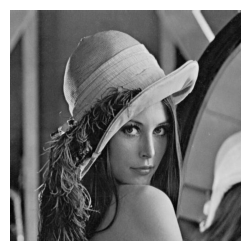

In [3]:
input_image=cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)
img_max = np.max(input_image)
img_min = np.min(input_image)
ancho, alto = input_image.shape
print("Dimensiones de la imagen: ", input_image.shape)
print("Tipo de dato: ", input_image.dtype)
print("Nivel máximo de intensidad: ", img_max)
print("Nivel mínimo de intensidad: ", img_min)
plt.imshow(input_image, cmap='gray')
plt.axis('off')
plt.show()

## Identidad

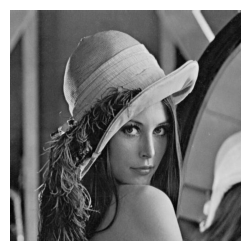

In [4]:
I = np.array([[1, 0, 0], 
             [0, 1, 0]], dtype=np.float32) # Definición de la matriz identidad
imageOut = cv2.warpAffine(input_image, I, (ancho, alto)) # Aplicar la transformación
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Traslación

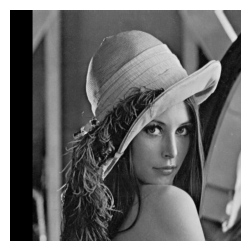

In [5]:
M = np.array([[1, 0, 50], 
             [0, 1, 0]], dtype=np.float32) # Definición de la matriz de transformación
imageOut = cv2.warpAffine(input_image, M, (ancho, alto)) 
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

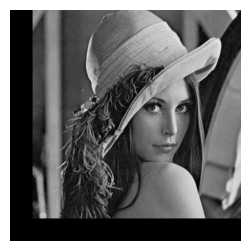

In [6]:
M = np.array([[1, 0, 50], 
             [0, 1, -50]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Escalamiento

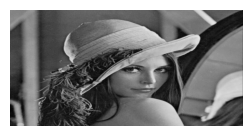

In [7]:
M = np.array([[2, 0, 0], 
             [0, 1, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho*2, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

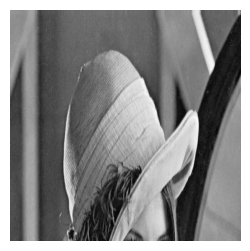

In [8]:
M = np.array([[1, 0, 0],
             [0, 2, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

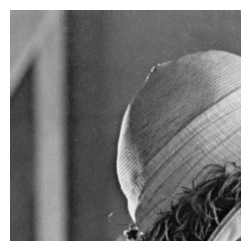

In [9]:
M = np.array([[2, 0, 0],
             [0, 2, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Rotación

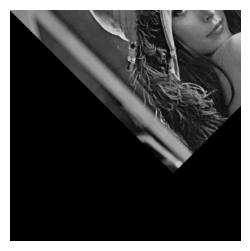

In [10]:
theta = np.deg2rad(45) # Ángulo de rotación en radianes
M = np.array([[np.cos(theta), np.sin(theta), 0], 
             [-np.sin(theta), np.cos(theta), 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
# Centrar la imagen
theta = np.deg2rad(45)
M = np.array([[np.cos(theta), np.sin(theta), 0], 
             [-np.sin(theta), np.cos(theta), 0]])
centro = np.array([ancho//2, alto//2, 1])
nuevo_centro=np.matmul(M,centro)
centro[:2]-nuevo_centro

array([-106.03867197,  256.        ])

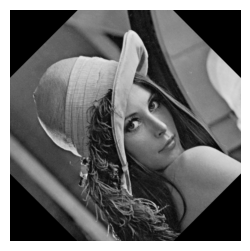

In [12]:
theta = np.deg2rad(45)
M = np.array([[np.cos(theta), np.sin(theta), -106.03867197], 
             [-np.sin(theta), np.cos(theta), 256]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Shearing

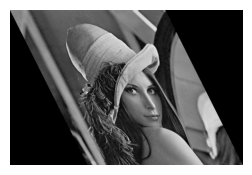

In [13]:
M = np.array([[1, 0.5, 0], 
             [0, 1, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (int(ancho*1.5), alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

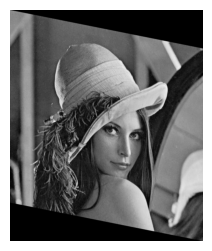

In [14]:
M = np.array([[1, 0, 0], 
             [0.2, 1, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (ancho, int(alto*1.2)))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

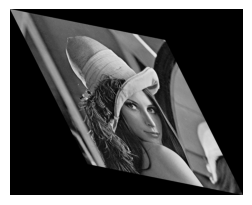

In [15]:
M = np.array([[1, 0.5, 0], 
             [0.2, 1, 0]], dtype=np.float32)
imageOut = cv2.warpAffine(input_image, M, (int(ancho*1.5), int(alto*1.2)))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Operaciones compuestas

In [16]:
dx, dy = 100, -30 # Traslación en el eje horizontal y en el eje vertical
traslation = np.array([[1, 0, dx],
                       [0, 1, dy],
                       [0, 0, 1]], dtype=np.float32)

theta = np.deg2rad(30)
rotation = np.array([[np.cos(theta) , np.sin(theta), 0],
                     [-np.sin(theta), np.cos(theta), 0],
                     [             0,             0, 1]], dtype=np.float32)

M = np.matmul(traslation, rotation)[:2,:] # Multiplicación de las matrices de transformación. Nos quedamos solo
print(M)                                  # con las dos primeras filas para usarla con warpAffine.

[[  0.8660254   0.5       100.       ]
 [ -0.5         0.8660254 -30.       ]]


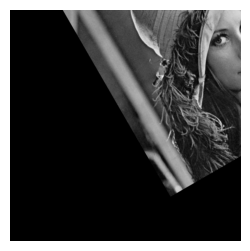

In [17]:
imageOut = cv2.warpAffine(input_image, M, (ancho, alto))
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

## Ejercicio

Genere y pruebe las matrices de transformación compuestas para:

**a)** Escalamiento y traslación

**b)** Escalamiento, traslación y rotación

**c)** Shear vertical, escalamiento, traslación y rotación

**d)** Responda: ¿El orden de las multiplicaciones importa?¿Por qué?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).